### Simple Regression Model
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

Here I use scikit-learn to implement simple linear regression. The data is from IBM cousre offered via Coursera: https://www.coursera.org/learn/machine-learning-with-python

The data contains Carbon dioxide emission of diffrent cars. 

I will split data into training and test sets, create a model using training set, evaluate the model using test set, and finally use the model to predict unknown value.

### Importing Needed packages

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import warnings
%matplotlib inline

### Downloading Data

In [77]:
import urllib.request
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'
filename = 'FuelConsumption.csv'
urllib.request.urlretrieve(url, filename)

('FuelConsumption.csv', <http.client.HTTPMessage at 0x1beb6a51e80>)

### Reading data 

In [78]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration

In [79]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [80]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

### Feature selection

In [81]:
features = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
features.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


Let's plot selected features:

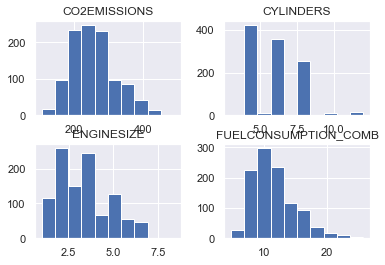

In [82]:
features.hist()
plt.show()

Let's check how linear is each features with CO2 emission. To check that we need to plot each feature against CO2 emission.

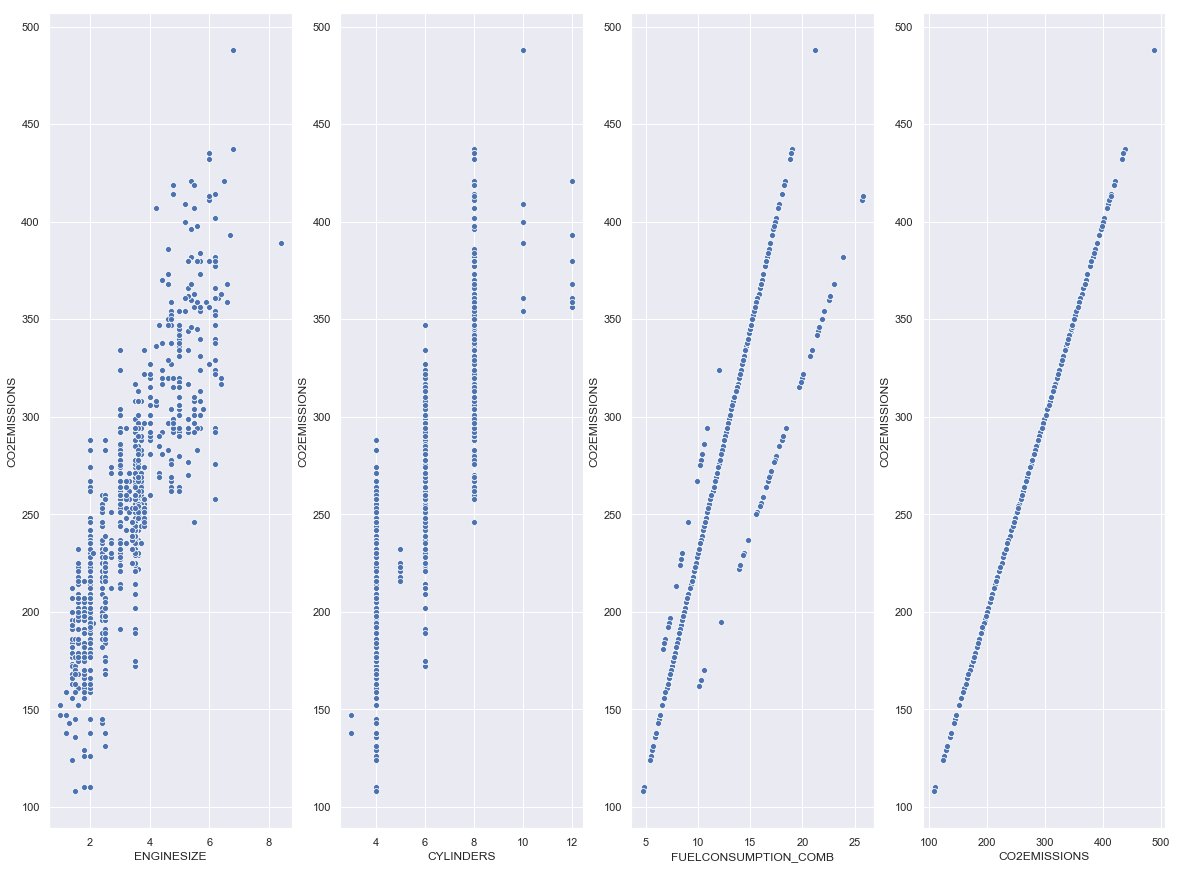

In [83]:
plt.figure(figsize=(20,15))
for i, col in enumerate(features.columns):
    plt.subplot(1,4,i+1)
    sns.scatterplot(x=col,y="CO2EMISSIONS", data=features)

### Creating train and test dataset

Then we need to split the dataset to train and test sets. We use the train set for training the model and test set for testing the set. As we do not use testing data to train the model, we can guarantee more accurate evaluation for out-of sample accaracy.

Lets split our dataset into train and test sets, 80%  for training and 20% for testing. 

First, let's make a mask to select random rows using _np.random.rand() function: 

In [84]:
# First, let's make a mask to select random rows
rands = np.random.rand(len(df))  # create an array of random numbers between 0 and 1 from uniform distribution
mask=rands < 0.8 # nearly 80% will be higher than 0.8
#df[booleans] filters the DataFrame to just have the true values.
train = features[mask] # 80% for the train set 
test = features[~mask]  # 20% for the test set

print(len(train))
print(len(test))

844
223


Let's look at the training set

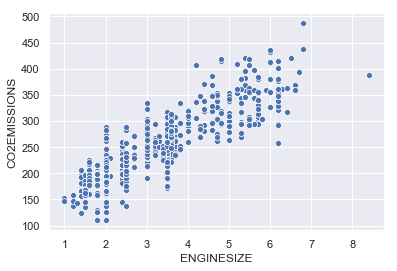

In [85]:
sns.scatterplot(x="ENGINESIZE", y="CO2EMISSIONS",data=train)

### Modeling

In [86]:
from sklearn import linear_model
regr = linear_model.LinearRegression() #create a linear regression
train_x = np.asanyarray(train[['ENGINESIZE']]) # Convert the input to an ndarray, but pass ndarray subclasses through.
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y) #fit the training data
# sklearn can estimate coefficient and intercept directly from the data
print ('Coefficients: ', regr.coef_) 
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.30423073]]
Intercept:  [124.86644321]


we can plot the fit line over the data:

39.304230730373334
124.86644321223707


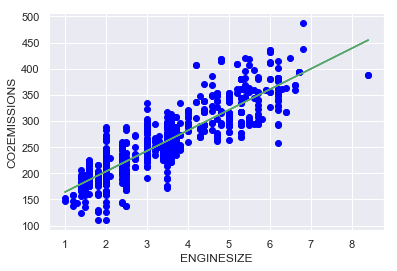

In [87]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-g')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
print(regr.coef_[0][0]) # 2d ndarray
print(regr.intercept_[0]) # 1d nd array

Seaborn jointplot function creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

C:\Users\Krish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


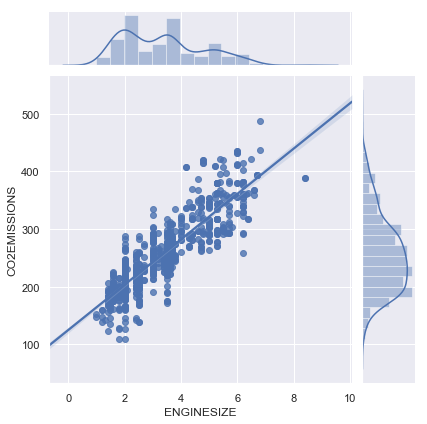

In [88]:
sns.jointplot(x='ENGINESIZE', y='CO2EMISSIONS', data=train, kind="reg")

Plotting residual plot is helpful to check whether the simple regression model is appropriate for the data set. Residual values should be randomely scattered around y=0.

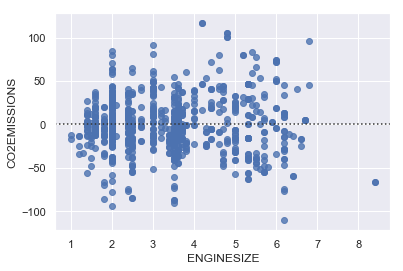

In [89]:
sns.residplot(x='ENGINESIZE', y='CO2EMISSIONS', data=train)

### Testing data

Let's predict values for test set.

In [90]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) # actual y values
test_y_hat = regr.predict(test_x) # predict y values

The following graph shows how predicted test data (test_y_hat) is different from actual test data (test_y)

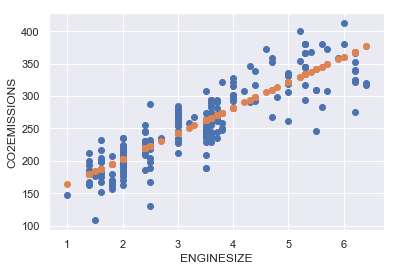

In [91]:
plt.scatter(test_x, test_y)
plt.scatter(test_x, test_y_hat)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

### Model Evaluation

To evaluate the model accuracy, actual values and predicted values should be compared. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics;

#### Mean Absolute Error: 
Mean of the absolute value of the errors.

In [92]:
#Mean absolute error: 
MAE=np.mean(np.absolute(test_y_hat - test_y))

print("Mean Absolute Error: %.2f" % MAE)

Mean Absolute Error: 23.19


#### Mean Squared Error (MSE): 
Mean of the squared error. The squared error exponentially increase larger errors more compaired to the smaller errors. Hence, it is more populer than Mean Absolute Error.

In [93]:
# Mean Squared Error (MSE)
MSE=np.mean((test_y_hat - test_y) ** 2)

print("Mean Squared Error (MSE): %.2f" % MSE)

Mean Squared Error (MSE): 867.83


#### Root Mean Squared Error (RMSE): 
Square root of the MSE

In [94]:
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error (RMSE): %.2f" % RMSE)

Root Mean Squared Error (RMSE): 29.46


#### R-squared
R-squared is a popular metric for accuracy of the model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits the data. The best score is 1.0. For arbitarily worse models the score can be negative.

In [96]:
from sklearn.metrics import r2_score
R_squared_score=r2_score(test_y_hat , test_y)
print("R_squared_score: %.2f" % R_squared_score)

R_squared_score: 0.69


As R_squared_score is 0.69, model is good. Let's predict the outcome (CO2 emisssion) for an unknown enginesize(10).

In [100]:
CO2emission_for_enginesize_10=regr.coef_[0][0]*10 + regr.intercept_[0]

In [101]:
CO2emission_for_enginesize_10

517.9087505159704